# Test Code

nr of spikes: 0


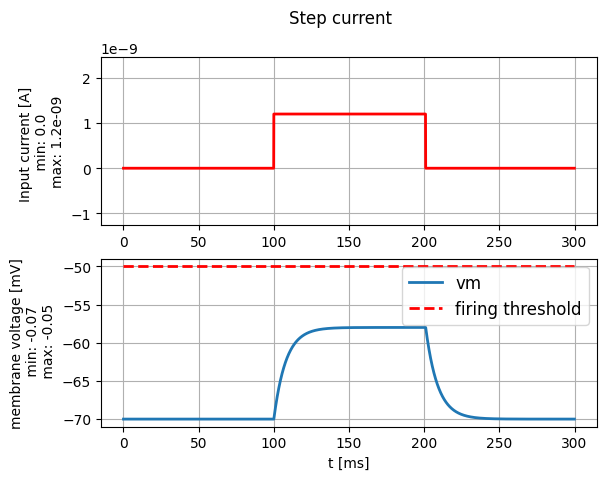

nr of spikes: 5


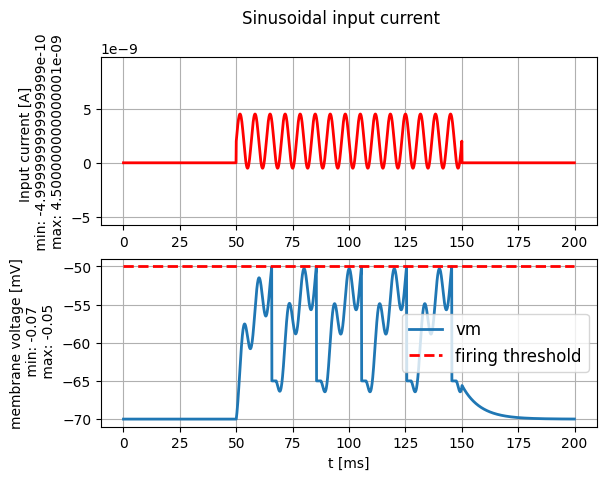

Resting potential: -0.07
Reset voltage: -0.065
Firing threshold: -0.05
Membrane resistance: 10000000.0
Membrane time-scale: 0.008
Absolute refractory period: 0.002


In [1]:
# %matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools

LIF.getting_started()
LIF.print_default_parameters()

In [7]:
# Default parameters for LIF

V_REST = -70*b2.mV
V_RESET = -65*b2.mV
FIRING_THRESHOLD = -50*b2.mV
MEMBRANE_RESISTANCE = 10. * b2.Mohm
MEMBRANE_TIME_SCALE = 8. * b2.ms
ABSOLUTE_REFRACTORY_PERIOD = 2.0 * b2.ms

# 1.1 Exercise: minimal current

## 1.1.1 Question: minimal current (calculation)

In [8]:
from neurodynex3.leaky_integrate_and_fire import LIF
print("resting potential: {}".format(LIF.V_REST))

resting potential: -0.07


## 1.1.2 Question: minimal current (simulation)

nr of spikes: 3


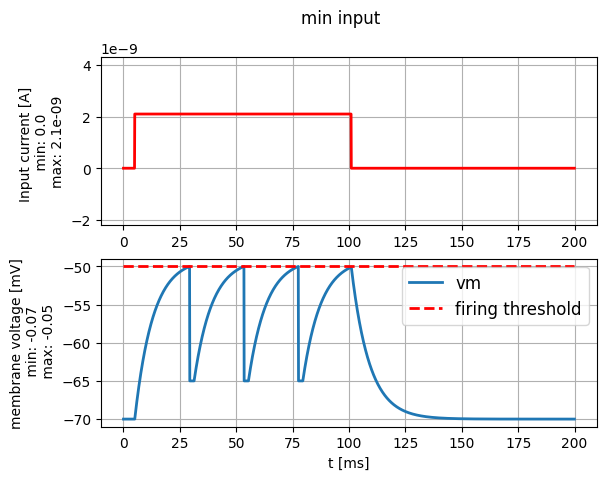

In [9]:
import brian2 as b2
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory

# create a step current with amplitude = I_min
step_current = input_factory.get_step_current(
    t_start=5, t_end=100, unit_time=b2.ms,
    amplitude=2.1*b2.namp)  # I_min을 2.0보다 큰 값으로 해야 voltage가 threshold를 넘는다. 

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 200 * b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

# 1.2 Exercise: f-I Curve

## 1.2.1 Question: f-I Curve and refractoryness

nr of spikes: 0
nr of spikes: 30
nr of spikes: 39
nr of spikes: 42
nr of spikes: 44
nr of spikes: 46
nr of spikes: 46
nr of spikes: 48
nr of spikes: 48
nr of spikes: 48


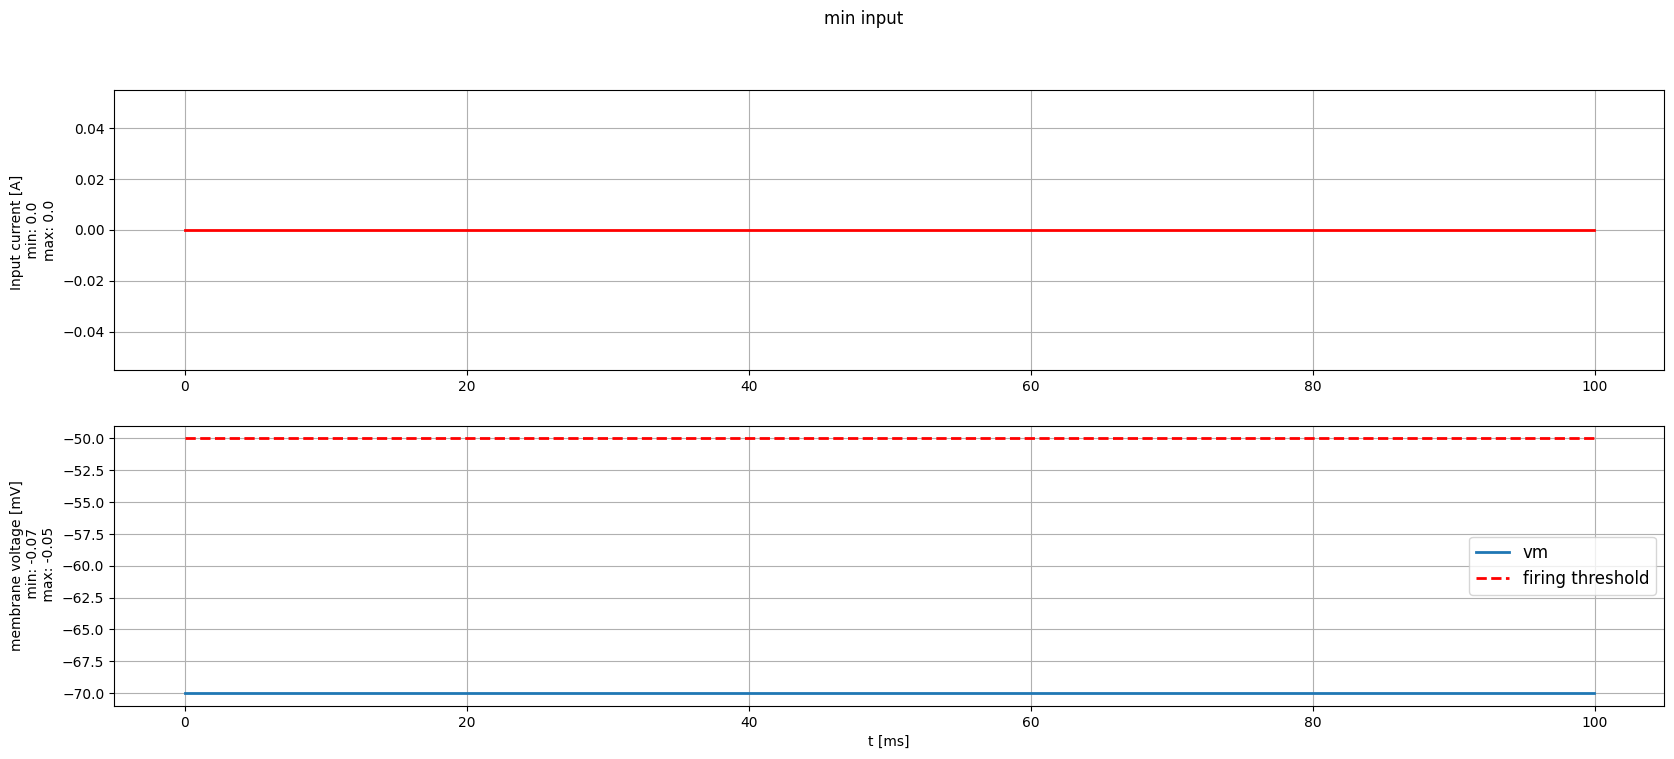

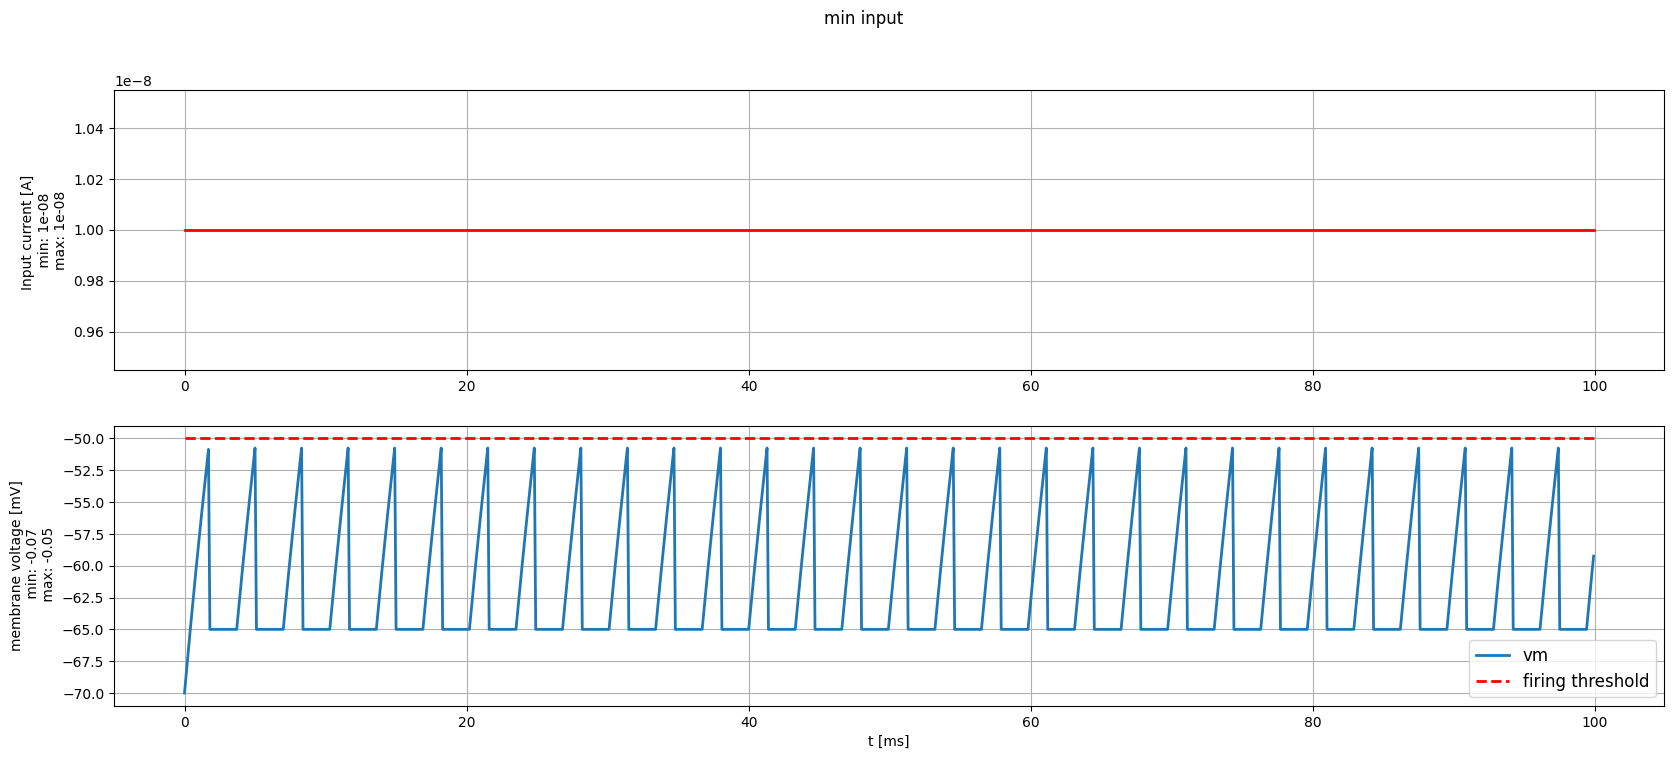

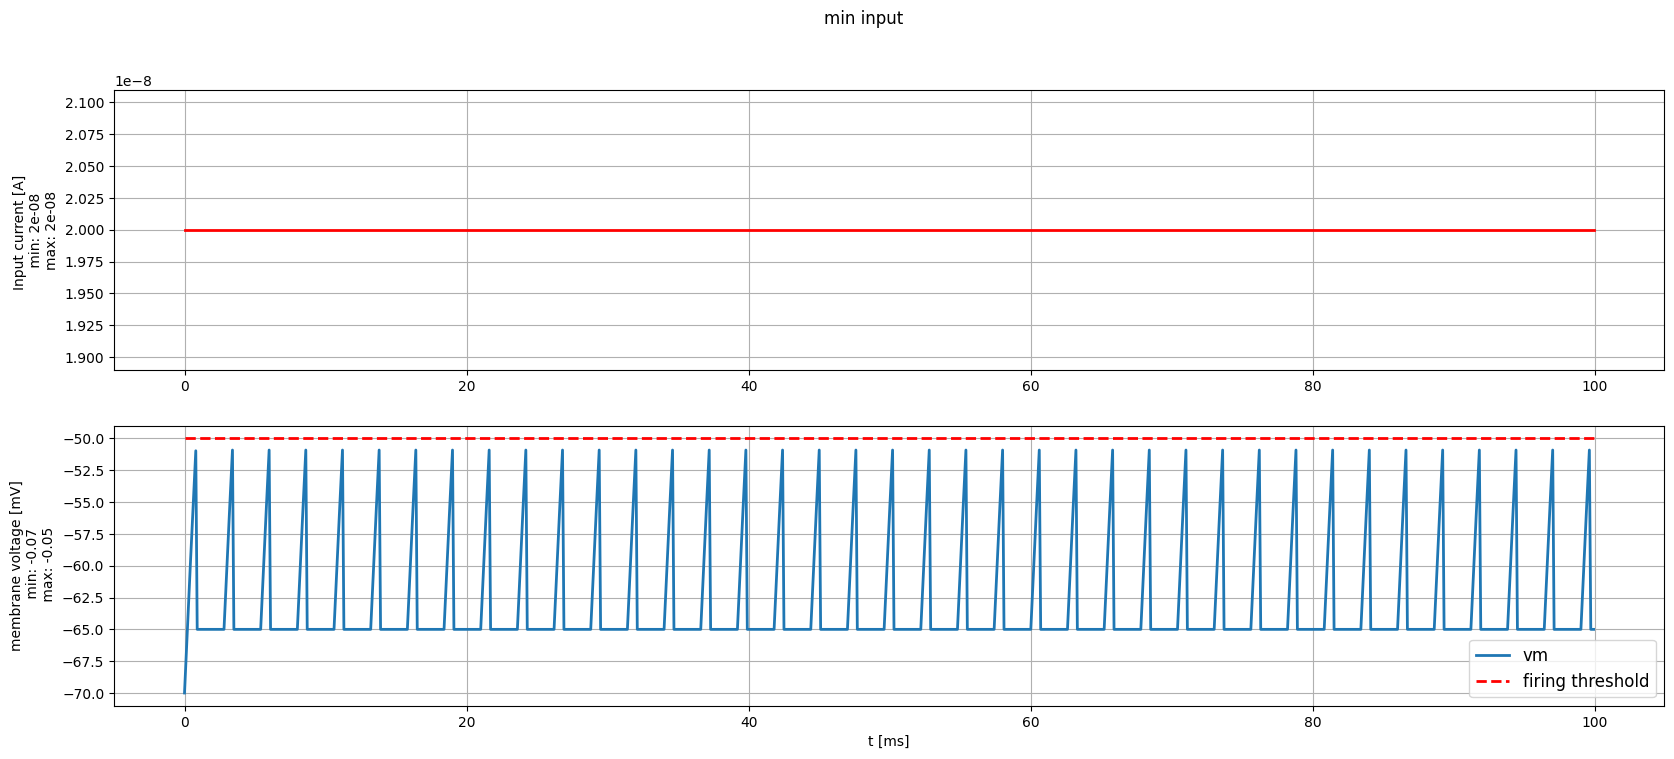

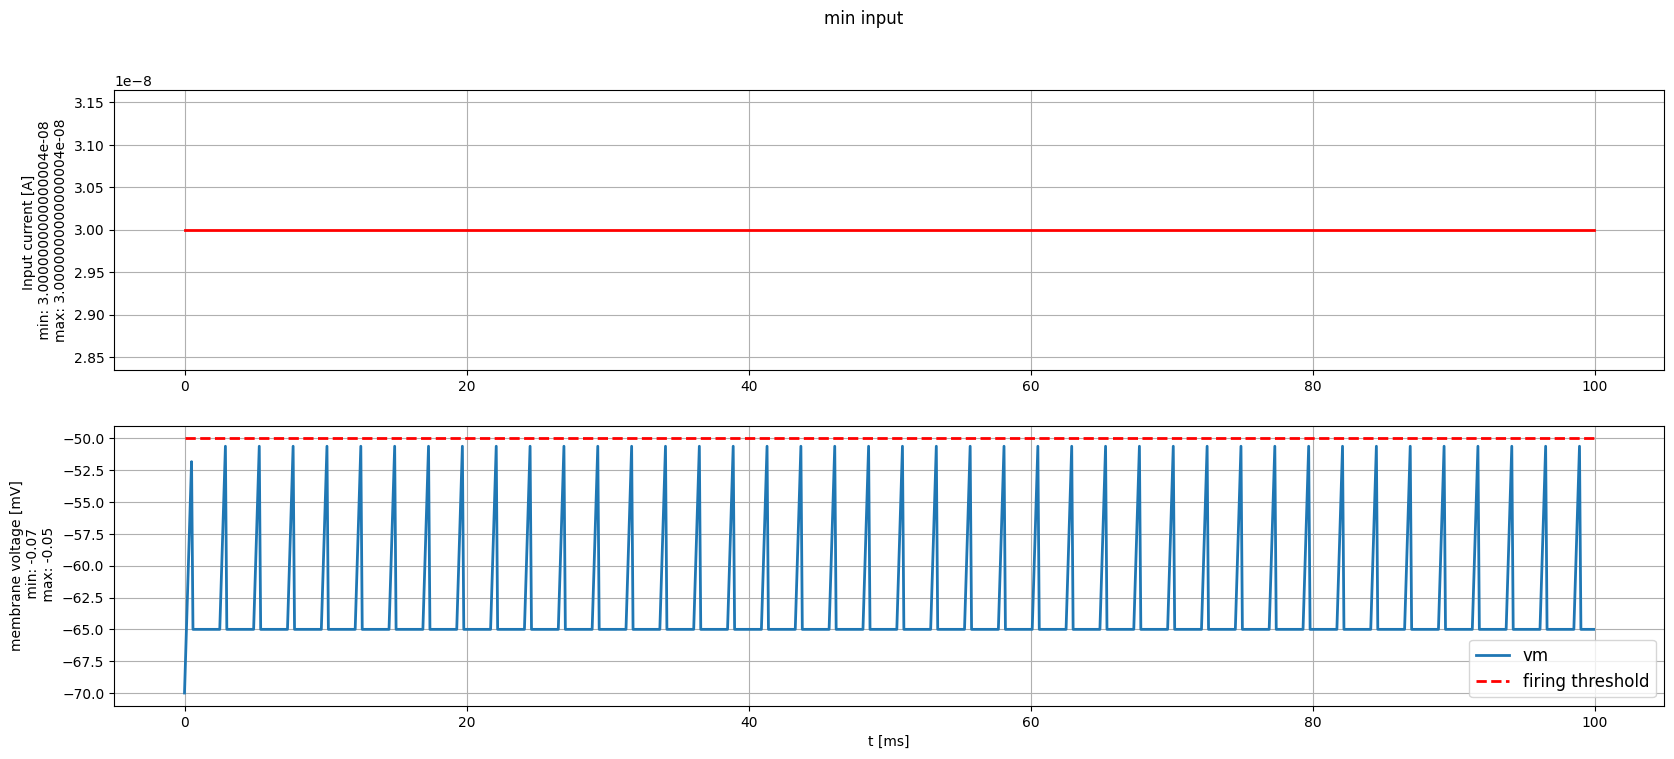

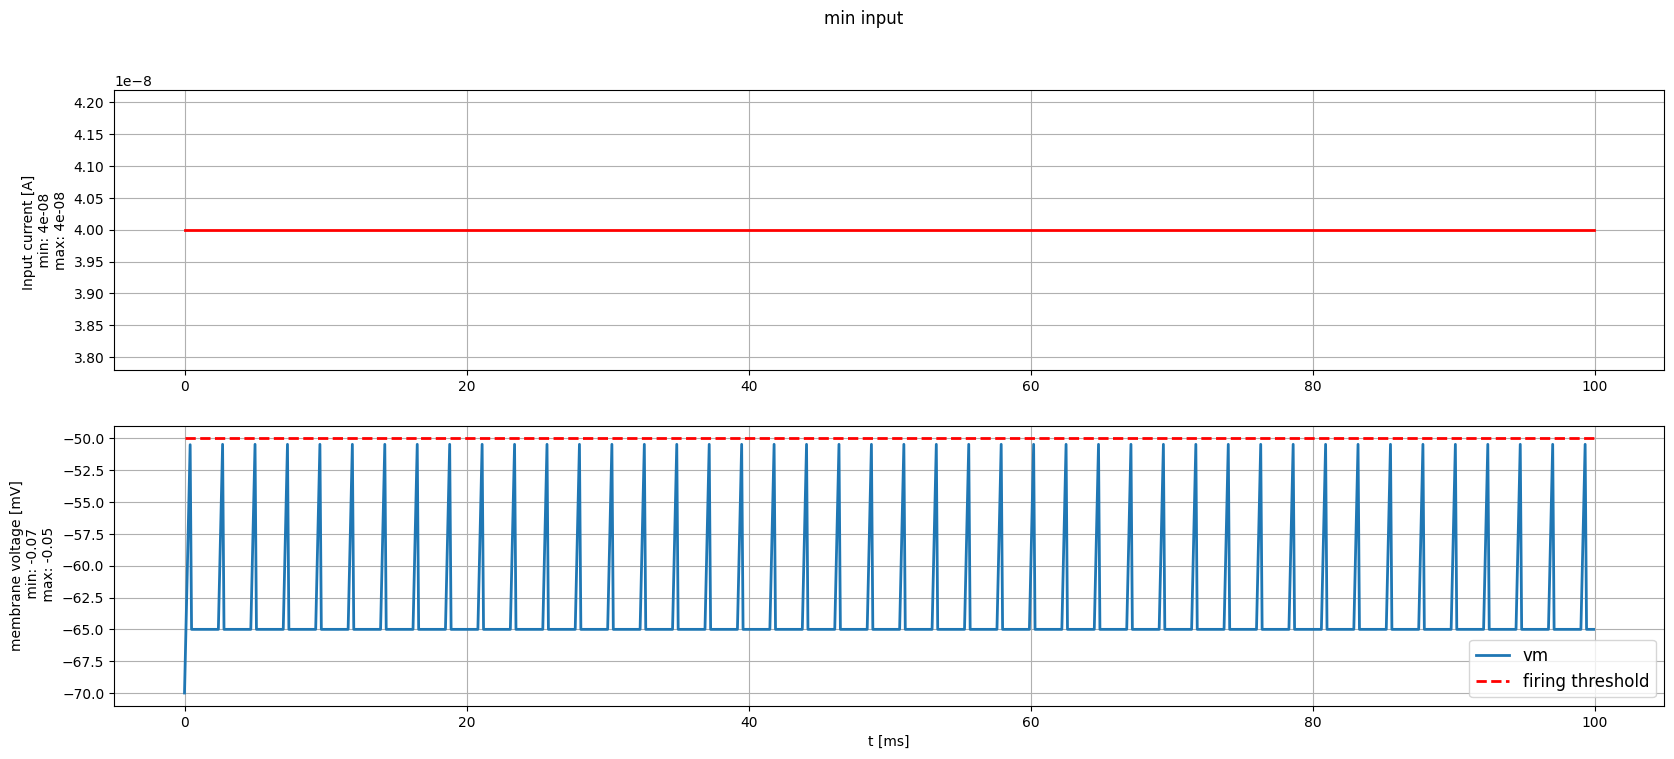

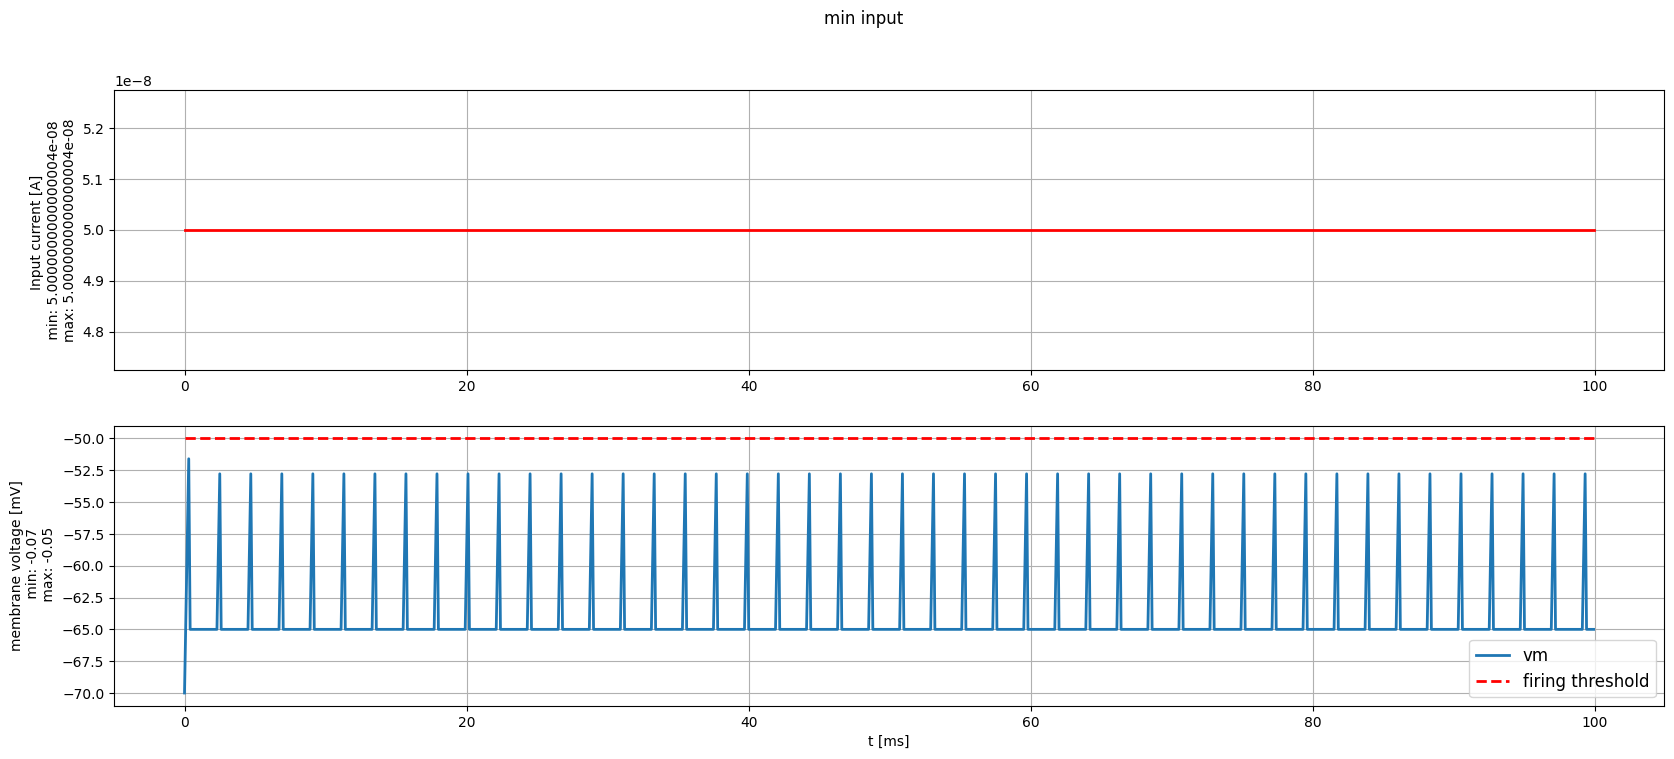

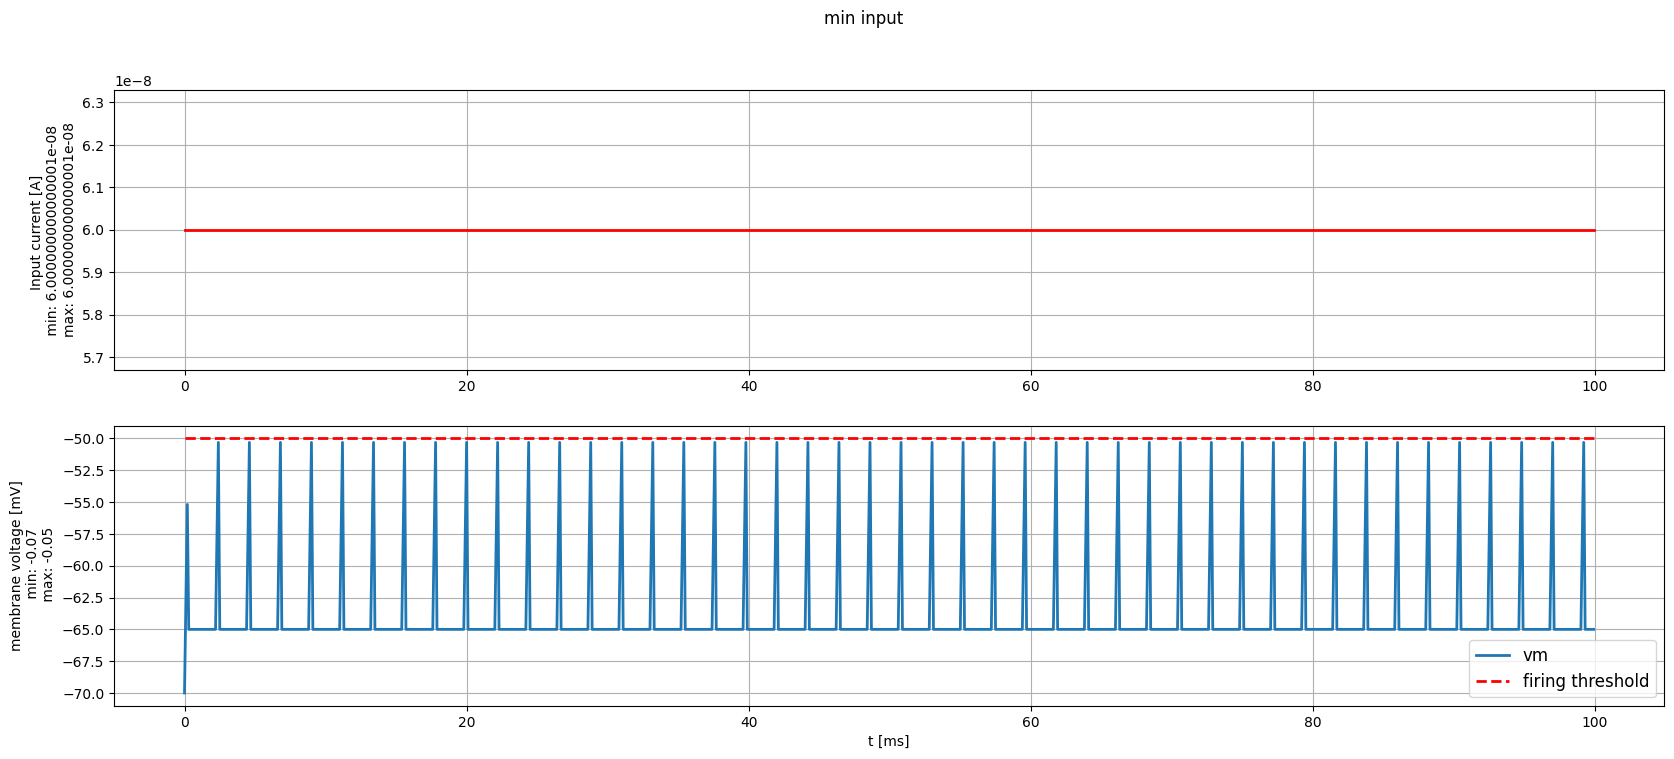

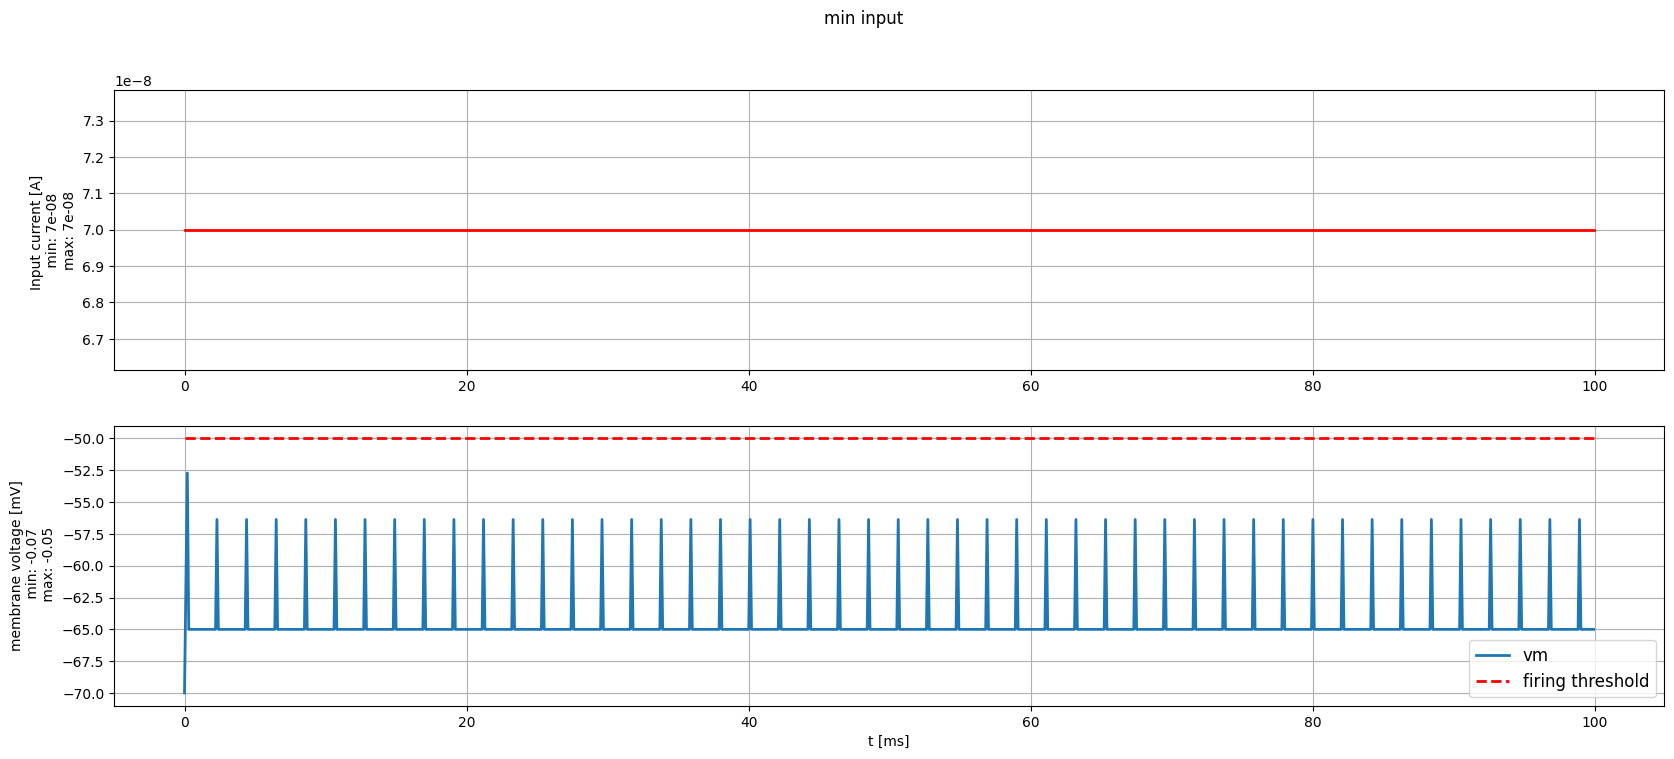

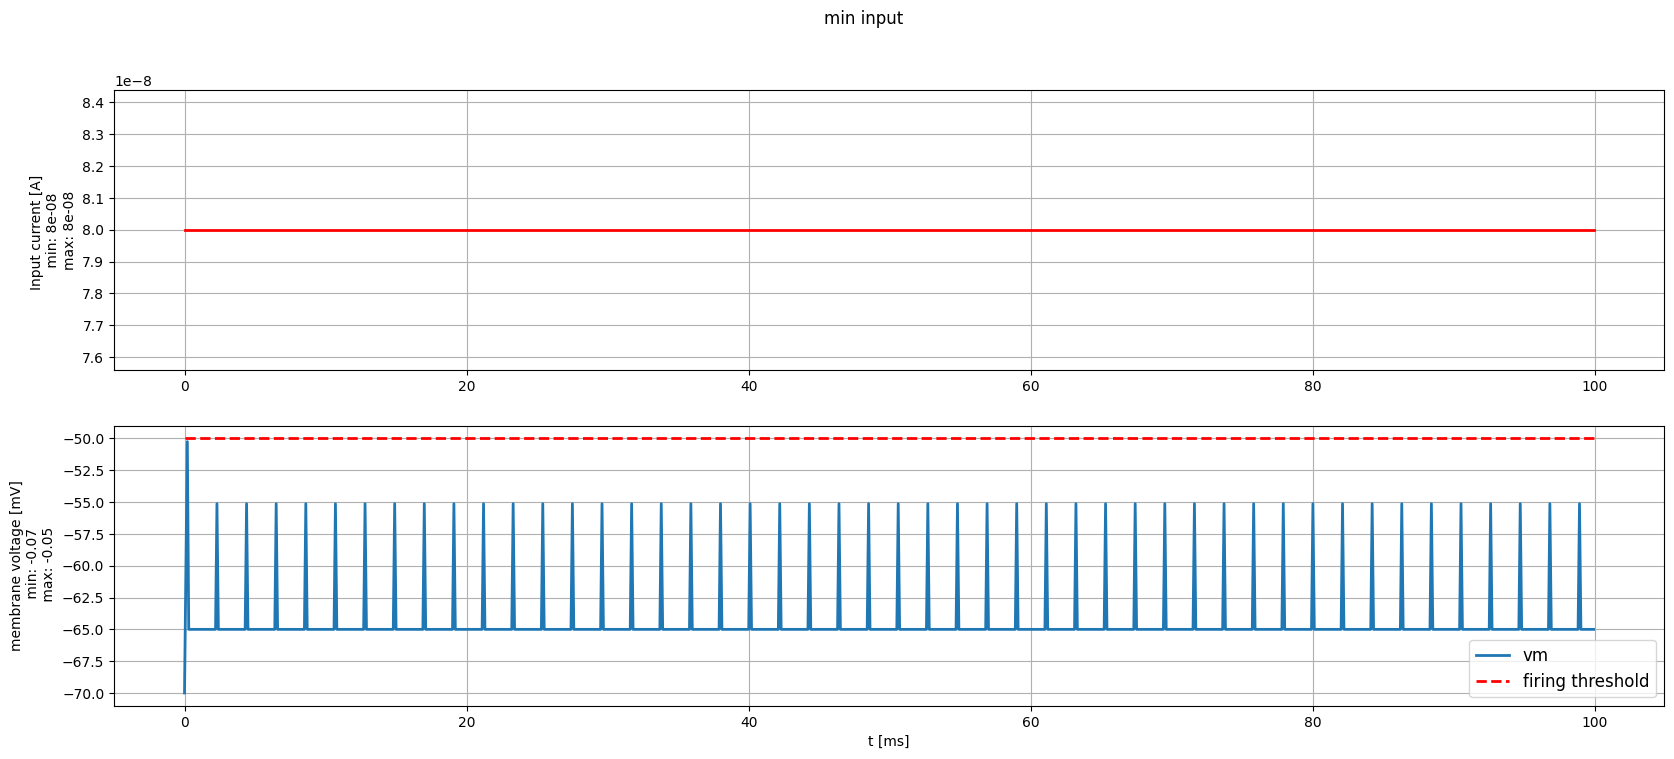

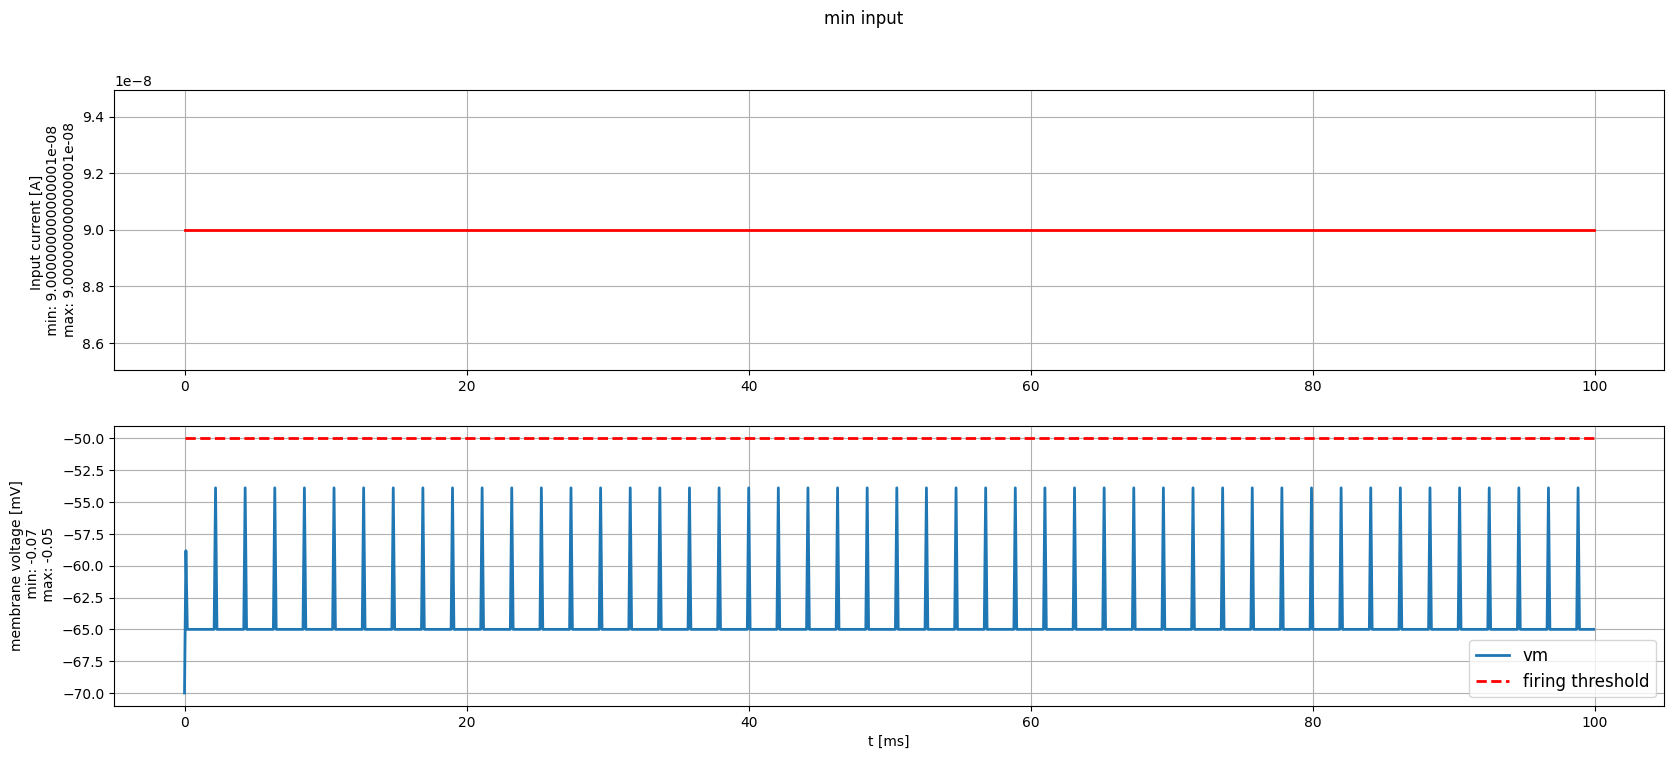

In [18]:
import brian2 as b2
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory

step_current = []
# create a step current with amplitude = I_min
for i in range(0, 100, 10):
    step_current.append(input_factory.get_step_current( t_start=0, t_end=100, unit_time=b2.ms, amplitude=i*b2.namp))  # set I_min to your value

    # run the LIF model.
    # Note: As we do not specify any model parameters, the simulation runs with the default values
    (state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current[i//10], simulation_time = 100 * b2.ms)

    # plot I and vm
    plt.figure(figsize = (20,8))
    plot_tools.plot_voltage_and_current_traces(state_monitor, step_current[i//10], title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
    print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

# 1.3 Exercise: "Experimentally" estimate the parameters of a LIF neuron

A LIF neuron is determined by the following parameters: Resting potential, reset voltage, firing threshold, membrane resistance, membrane time-scale, absolute refractory period.

## 1.3.1 Question: "Read" the LIF parameters out of the 'vm' plot

(<Axes: ylabel='Input current [A] \n min: 2e-08 \nmax: 2e-08'>,
 <Axes: xlabel='t [ms]', ylabel='membrane voltage [mV]\n min: -0.068\n max: -0.016154488272856656'>)

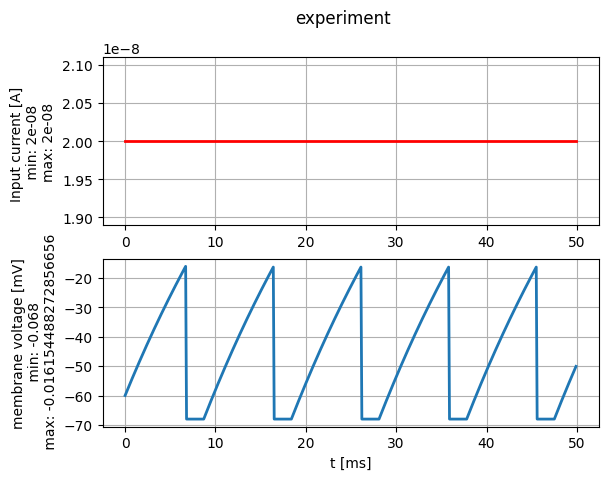

In [7]:
# get a random parameter. provide a random seed to have a reproducible experiment
random_parameters = LIF.get_random_param_set(random_seed=432)

# define your test current
test_current = input_factory.get_step_current(
    t_start=0, t_end=150, unit_time=b2.ms, amplitude= 20 * b2.namp)

# probe the neuron. pass the test current AND the random params to the function
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# plot
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="experiment")

# print the parameters to the console and compare with your estimates
# LIF.print_obfuscated_parameters(random_parameters)

# 1.4 Exercise: Sinusoidal input current and subthreshold response

## 1.4.1 Question

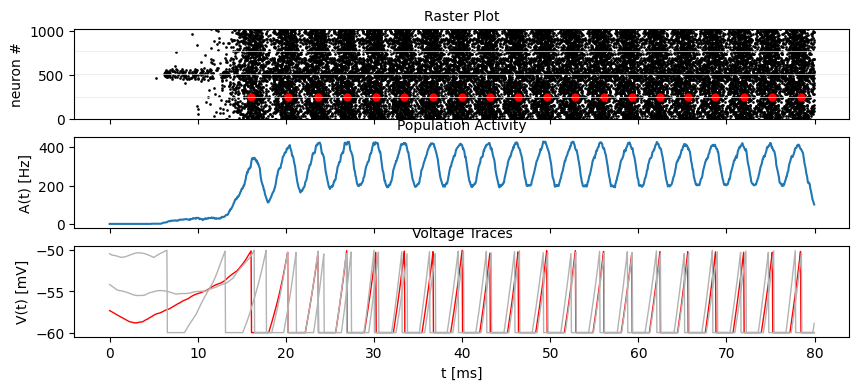

In [5]:
import brian2 as b2
from neurodynex3.working_memory_network import wm_model
from neurodynex3.tools import plot_tools
import matplotlib.pyplot as plt


rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(N_inhibitory = 1, stimulus_strength=0.65 * b2.namp, t_stimulus_start=5 * b2.ms, t_stimulus_duration=25 * b2.ms, sim_time=80. * b2.ms)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
plt.show()


In [6]:
import matplotlib.pyplot as plt

# 스파이크 데이터에서 400 ms 시점의 스파이크 선택
spike_times = spike_monitor_exc.t / b2.ms
neuron_indices = spike_monitor_exc.i
time_point = 400
time_window = 1  # 1 ms 시간 창
spikes_at_time_point = neuron_indices[(spike_times >= time_point) & (spike_times < (time_point + time_window))]

# 각 뉴런의 발화율 계산
num_neurons = len(np.unique(neuron_indices))
firing_rates = np.zeros(num_neurons)
for neuron in np.unique(neuron_indices):
    firing_rates[neuron] = np.sum(spikes_at_time_point == neuron)

# 발화율 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(range(num_neurons), firing_rates)
plt.xlabel('Neuron Index')
plt.ylabel('Firing Rate (spikes/ms)')
plt.title('Firing Rate across the Population at t = 400 ms')
plt.show()


NameError: name 'spike_monitor_exc' is not defined